<a href="https://colab.research.google.com/github/IlhamThrq/AI_TI-1B_2025/blob/main/SVM%20DAN%20NA%C3%8FVE%20BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 9: SVM DAN NAÏVE BAYES

## A. LATIHAN

### 1. Percobaan 1 Implementasi Support Vector Machine (SVM)


In [22]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Membaca dataset diabetes
df = pd.read_csv('diabetes.csv')

# Melihat 5 baris pertama
print(df.head())

# Menampilkan info dataset
print(df.info())

# Memisahkan atribut dan label
X = df[df.columns[:8]]
y = df['Outcome']

# Standarisasi data
sc = StandardScaler()
X = sc.fit_transform(X)

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Membuat model SVM dan melatih
clf = SVC()
clf.fit(X_train, y_train)

# Evaluasi akurasi
print("Akurasi SVM:", clf.score(X_test, y_test))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

### 2. Percobaan 2: Implementasi Support Vector Regression (SVR)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


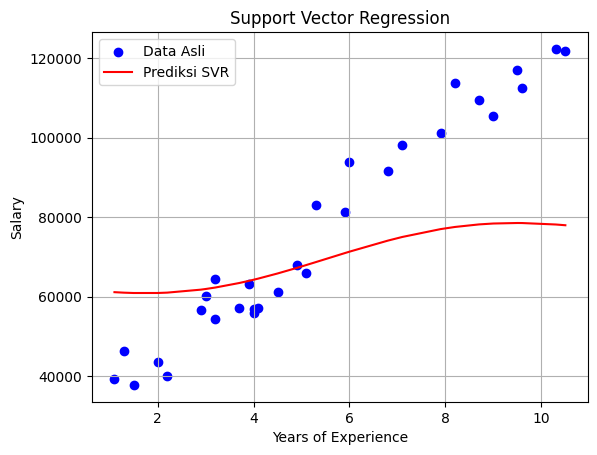

In [23]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Membaca dataset gaji
data = pd.read_csv('Salary_Data.csv')

# Menampilkan 5 baris pertama
print(data.head())

# Mengecek info data
print(data.info())

# Memisahkan atribut dan label
X = data['YearsExperience'].values[:, np.newaxis]
y = data['Salary'].values

# Membuat model SVR dan melatih
model = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X, y)

# Visualisasi hasil regresi
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', label='Prediksi SVR')
plt.title('Support Vector Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


### 3. Percobaan 3: Implementasi Naïve Bayes

         ID Jenis_Kelamin  Umur        Gaji  Transaksi
0  15624510          Pria    19   285000000          0
1  15810944          Pria    35   300000000          0
2  15668575        Wanita    26   645000000          0
3  15603246        Wanita    27   855000000          0
4  15804002          Pria    19  1140000000          0
Akurasi Naïve Bayes: 87.50%
Confusion Matrix:
 [[52  4]
 [ 6 18]]


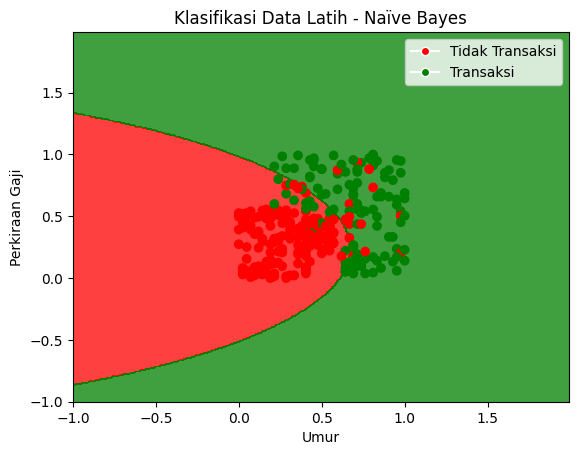

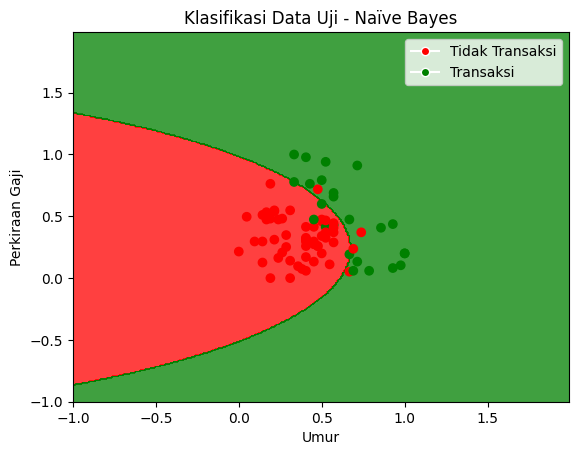

In [24]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Membaca dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')

# Menampilkan 5 baris pertama
print(dataset.head())

# Memisahkan fitur dan label
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Normalisasi fitur
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Melatih model Naïve Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi Naïve Bayes: {:.2f}%".format(acc * 100))
print("Confusion Matrix:\n", cm)

# Visualisasi Data Latih
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                                   stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1,
                                   stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2,
                 classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))

    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel('Umur')
    plt.ylabel('Perkiraan Gaji')
    plt.legend(handles=[
        plt.Line2D([], [], marker='o', color='w', label='Tidak Transaksi', markerfacecolor='red'),
        plt.Line2D([], [], marker='o', color='w', label='Transaksi', markerfacecolor='green')
    ])
    plt.show()

# Visualisasi training dan testing
plot_decision_boundary(X_train, y_train, 'Klasifikasi Data Latih - Naïve Bayes')
plot_decision_boundary(X_test, y_test, 'Klasifikasi Data Uji - Naïve Bayes')


## B. TUGAS PRAKTIKUM


### 1. Optimasi Parameter SVM dan SVR menggunakan Grid Search

#### a. Support Vector Machine (SVM) – Klasifikasi Diabetes

In [ ]:
#  Import Library Utama & Preprocessing
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Untuk ensemble
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load dan Split Data Diabetes (SVM)
df = pd.read_csv('diabetes.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split awal
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

# Pipeline dengan SMOTE + PowerTransform + SVM
pipeline_svm = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scale', StandardScaler()),
    ('svc', SVC())
])

param_grid_svm = {
    'svc__C': np.logspace(-3, 3, 7),         # 0.001,0.01,...,1000
    'svc__gamma': np.logspace(-4, 1, 6),     # 1e-4 → 10
    'svc__kernel': ['rbf','poly','sigmoid'],
    'svc__degree': [2,3,4],                  # hanya untuk poly
    'svc__class_weight': [None, 'balanced']
}

grid_svm = GridSearchCV(
    pipeline_svm,
    param_grid=param_grid_svm,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_svm.fit(X_train, y_train)

print("=== SVM Best Params ===")
print(grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Ensemble Stacking (opsional)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', grid_svm.best_estimator_.named_steps['svc'])  # model SVM terbaik
]
stack = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
stack.fit(grid_svm.best_estimator_.named_steps['scale'].transform(
           grid_svm.best_estimator_.named_steps['power'].transform(
             grid_svm.best_estimator_.named_steps['smote'].fit_resample(X_train, y_train)[0]
           )
         ), y_train)

y_pred_stack = stack.predict(grid_svm.best_estimator_.named_steps['scale'].transform(
                               grid_svm.best_estimator_.named_steps['power'].transform(
                                 grid_svm.best_estimator_.named_steps['smote'].fit_resample(X_test, y_test)[0]
                               )
                             ))
print("Akurasi Ensemble (RF+SVM):", accuracy_score(y_test, y_pred_stack))

# Contoh Grid Search SVR & Naïve Bayes
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# --- SVR ---
data = pd.read_csv('Salary_Data.csv')
Xr = data['YearsExperience'].values.reshape(-1,1)
yr = data['Salary'].values

pipeline_svr = Pipeline([
    ('scale', MinMaxScaler()),
    ('svr', SVR())
])
param_grid_svr = {
    'svr__C': np.logspace(1,4,4),        # 10 → 10000
    'svr__gamma': np.logspace(-3,0,4),   # 0.001 → 1
    'svr__kernel': ['rbf','linear']
}
grid_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_svr.fit(Xr, yr)
print("SVR Best Params:", grid_svr.best_params_)
print("R2 Score SVR:", grid_svr.best_score_)

# --- GaussianNB dengan fitur tambahan (jika relevan) ---
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
Xn = dataset.iloc[:,2:-1].values
yn = dataset.iloc[:,-1].values
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=99)

pipeline_nb = Pipeline([
    ('power', PowerTransformer()),     # transformasi
    ('scale', MinMaxScaler()),
    ('nb', GaussianNB())
])
param_grid_nb = {
    'nb__var_smoothing': np.logspace(-11, -5, 7)
}
grid_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_nb.fit(Xn_train, yn_train)

print("NB Best Params:", grid_nb.best_params_)
yn_pred = grid_nb.predict(Xn_test)
print("Akurasi NB:", accuracy_score(yn_test, yn_pred))



Fitting 5 folds for each of 756 candidates, totalling 3780 fits


#### b. Support Vector Regression (SVR) – Prediksi Gaji

In [27]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Membaca dataset
data = pd.read_csv('Salary_Data.csv')
X = data['YearsExperience'].values[:, np.newaxis]
y = data['Salary'].values

# Grid parameter
param_grid = {
    'C': [100, 1000, 5000],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Melakukan Grid Search
grid = GridSearchCV(SVR(), param_grid, refit=True, cv=5, verbose=1, n_jobs=-1)
grid.fit(X, y)

# Menampilkan hasil terbaik
print("Parameter terbaik untuk SVR:", grid.best_params_)
print("Skor terbaik SVR (koefisien determinasi/R2):", grid.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Parameter terbaik untuk SVR: {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}
Skor terbaik SVR (koefisien determinasi/R2): 0.027693280673369892


### 2. Tuning Model Naïve Bayes untuk Meningkatkan Akurasi


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Membaca dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Normalisasi data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Grid parameter untuk var_smoothing
param_grid = {
    'var_smoothing': np.logspace(-9, -6, 10)
}

# Grid Search
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

# Evaluasi hasil
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Parameter terbaik Naïve Bayes:", grid.best_params_)
print("Akurasi setelah tuning: {:.2f}%".format(acc * 100))
print("Matriks konfusi:\n", cm)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter terbaik Naïve Bayes: {'var_smoothing': np.float64(1e-09)}
Akurasi setelah tuning: 87.50%
Matriks konfusi:
 [[52  4]
 [ 6 18]]
